## Logistic Regression Case Study on -

## Lead Scoring

### Problem Statement

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos.
When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals.
Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, **the company wishes to identify the most potential leads, also known as ‘Hot Leads’**.
If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. A typical lead conversion process can be represented using the following funnel:

<img src="https://cdn.upgrad.com/UpGrad/temp/189f213d-fade-4fe4-b506-865f1840a25a/XNote_201901081613670.jpg">

                  
                                
                               Lead Conversion Process - Demonstrated as a funnel
As you can see, there are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom.
In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers.The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance.**The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.**

### Data

You have been provided with a leads dataset from the past with around 9000 data points. This dataset consists of various attributes such as Lead Source, Total Time Spent on Website, Total Visits, Last Activity, etc. which may or may not be useful in ultimately deciding whether a lead will be converted or not. The target variable, in this case, is the column ‘Converted’ which tells whether a past lead was converted or not wherein 1 means it was converted and 0 means it wasn’t converted.

Another thing that you also need to check out for are the levels present in the categorical variables.

Many of the categorical variables have a level called 'Select' which needs to be handled because it is as good as a null value.

### Goal

There are quite a few goals for this case study.

* **Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.**


In [99]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [100]:
import time, warnings
import datetime as dt

from IPython.display import display


In [101]:
# Importing Pandas and NumPy
import pandas as pd, numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [102]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [103]:
# Importing lead dataset from drive
lead_data = pd.read_csv("/content/drive/MyDrive/Lead Scoring Assignment/Leads.csv")
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


Data Inspection


In [104]:
lead_data.shape

(9240, 37)

We have 9240 rows and 37 columns in the leads dataset.

In [105]:
# checking non null count and datatype of the variables
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [106]:
# Describing data
lead_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


From above description about counts, we can see that there are missing values present in the data.

**Data Cleaning**

1)Handling the 'Select' level that is present in many of the categorical variables

In [107]:
# Converting 'Select' values to NaN.
lead_data = lead_data.replace('Select', np.nan)

In [108]:
# checking the columns for null values
lead_data.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [109]:
# Finding the null percentages across columns
null_pecentage=round(lead_data.isnull().sum()/len(lead_data.index),2)*100

We are dropping the columns with missing values greater than 40%

In [110]:
#lead_data=lead_data.drop(columns=['How did you hear about X Education','Lead Quality','Lead Profile',
                                  #'Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score',
                                 #'Asymmetrique Profile Score'])

In [111]:
for col in lead_data.columns:
    if lead_data[col].isnull().sum() > 3000:
        lead_data.drop(col, 1, inplace=True)

In [112]:
round(lead_data.isnull().sum()/len(lead_data.index),2)*100

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article                                 0.0
X Education Forums                                0.0
Newspaper                   

In [113]:
# Imputing the missing data in the 'Country' column with 'India'
lead_data['Country']=lead_data['Country'].replace(np.nan,'India')

In [114]:
round(lead_data['What is your current occupation'].value_counts(normalize=True),2)*100

Unemployed              85.0
Working Professional    11.0
Student                  3.0
Other                    0.0
Housewife                0.0
Businessman              0.0
Name: What is your current occupation, dtype: float64

In [115]:
# Imputing the missing data in the 'What is your current occupation' column with 'Unemployed'
lead_data['What is your current occupation']=lead_data['What is your current occupation'].replace(np.nan,'Unemployed')

In [116]:
round(lead_data['What matters most to you in choosing a course'].value_counts(normalize=True),2)*100

Better Career Prospects      100.0
Flexibility & Convenience      0.0
Other                          0.0
Name: What matters most to you in choosing a course, dtype: float64

In [117]:
# Dropping this column
lead_data=lead_data.drop('What matters most to you in choosing a course',axis=1)

In [118]:
# Finding the null percentages across columns after removing the above columns
round(lead_data.isnull().sum()/len(lead_data.index),2)*100

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 1.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        1.0
Last Activity                               1.0
Country                                     0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses  

Rest missing values are under 2% so we can drop these rows.

In [119]:
# Dropping the rows with null values
lead_data.dropna(inplace = True)

In [120]:
# Finding the null percentages across columns after removing the above columns
round(lead_data.isnull().sum()/len(lead_data.index),2)*100

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Country                                     0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses  

In [121]:
# Percentage of rows retained
(len(lead_data.index)/9240)*100

98.2034632034632

We have retained 98% of the rows after cleaning the data .

**EXPLORATORY DATA ANALYSIS**

In [122]:
#Checking for duplicates

lead_data[lead_data.duplicated()]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


There is no duplicate column

# Univariate Analysis and Bivariate Analysis

1) Converted:
Converted is the target variable, Indicates whether a lead has been successfully converted (1) or not (0)

In [123]:
Converted = (sum(lead_data['Converted'])/len(lead_data['Converted'].index))*100
Converted

37.85541106458012

The lead conversion is 37.8%

2) Lead Origin

(array([0, 1, 2, 3]),
 [Text(0, 0, 'API'),
  Text(1, 0, 'Landing Page Submission'),
  Text(2, 0, 'Lead Add Form'),
  Text(3, 0, 'Lead Import')])

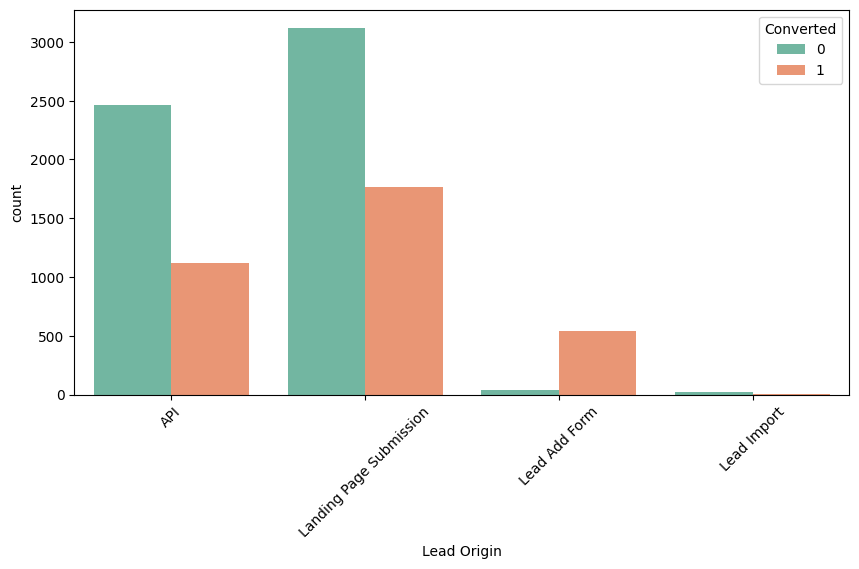

In [124]:
plt.figure(figsize=(10,5))
sns.countplot(x = "Lead Origin", hue = "Converted", data = lead_data,palette='Set2')
plt.xticks(rotation = 45)

**Observation**


1.   landing page submission has highest number of conversion followed by API
2.   Lead Add Form has more than 90% conversion rate but count of lead are not very hgh.
3. :ea import is very insiniicant.


Insight: To improve overall lead conversion rate, we need to focus more on improving lead converion of API and Landing Page Submission origin and generate more leads from Lead Add Form.


3.Lead Source

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, 'Olark Chat'),
  Text(1, 0, 'Organic Search'),
  Text(2, 0, 'Direct Traffic'),
  Text(3, 0, 'Google'),
  Text(4, 0, 'Referral Sites'),
  Text(5, 0, 'Reference'),
  Text(6, 0, 'google'),
  Text(7, 0, 'Welingak Website'),
  Text(8, 0, 'Facebook'),
  Text(9, 0, 'blog'),
  Text(10, 0, 'Pay per Click Ads'),
  Text(11, 0, 'bing'),
  Text(12, 0, 'Social Media'),
  Text(13, 0, 'WeLearn'),
  Text(14, 0, 'Click2call'),
  Text(15, 0, 'Live Chat'),
  Text(16, 0, 'welearnblog_Home'),
  Text(17, 0, 'youtubechannel'),
  Text(18, 0, 'testone'),
  Text(19, 0, 'Press_Release'),
  Text(20, 0, 'NC_EDM')])

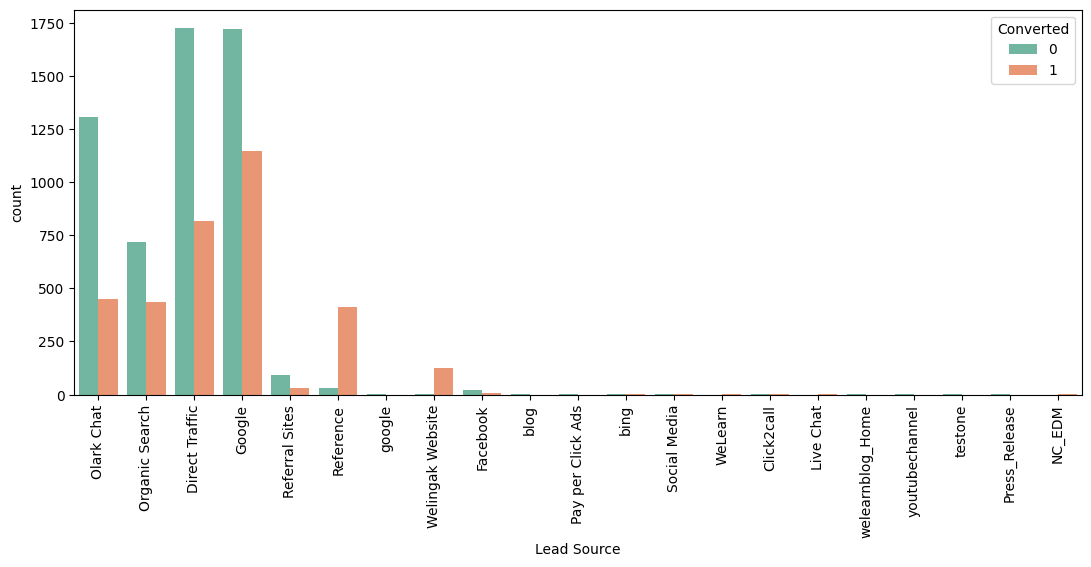

In [125]:
plt.figure(figsize=(13,5))
sns.countplot(x = "Lead Source", hue = "Converted", data = lead_data, palette='Set2')
plt.xticks(rotation = 90)

In [126]:
# Need to replace 'google' with 'Google'
lead_data['Lead Source'] = lead_data['Lead Source'].replace(['google'], 'Google')

In [127]:
# Creating a new category 'Others' for some of the Lead Sources which do not have much values.
lead_data['Lead Source'] = lead_data['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Others')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Olark Chat'),
  Text(1, 0, 'Organic Search'),
  Text(2, 0, 'Direct Traffic'),
  Text(3, 0, 'Google'),
  Text(4, 0, 'Referral Sites'),
  Text(5, 0, 'Reference'),
  Text(6, 0, 'Welingak Website'),
  Text(7, 0, 'Facebook'),
  Text(8, 0, 'Others')])

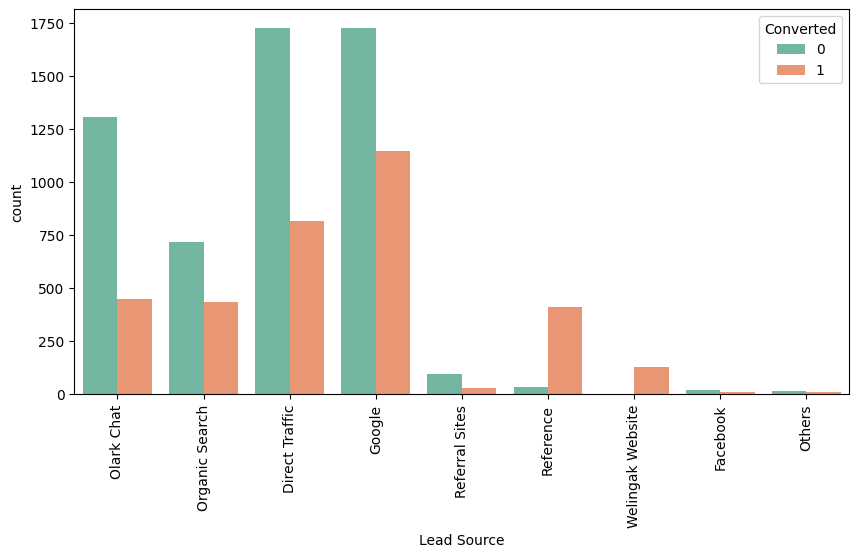

In [128]:
# Visualizing again
plt.figure(figsize=(10,5))
sns.countplot(x = "Lead Source", hue = "Converted", data = lead_data,palette='Set2')
plt.xticks(rotation = 90)

**Obervation:**
1. Google and Direct traffic generates maximum number of leads.
2. Conversion Rate of reference leads and leads through welingak website is high.

**Insight:**
To improve overall lead conversion rate, focus should be on improving lead converion of olark chat, organic search, direct traffic, and google leads and generate more leads from reference and welingak website.

4. **Do not Email**

<Axes: xlabel='Do Not Email', ylabel='count'>

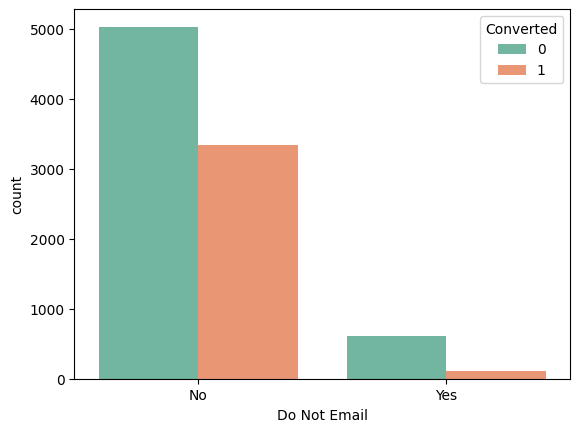

In [129]:
sns.countplot(x = "Do Not Email", hue = "Converted", data = lead_data,palette='Set2')


Most entries are 'No'. No Inference can be drawn with this parameter.

**5) Do not call**

<Axes: xlabel='Do Not Call', ylabel='count'>

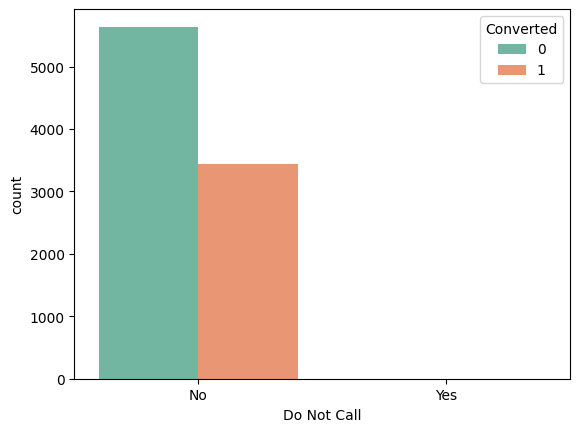

In [130]:
sns.countplot(x = "Do Not Call", hue = "Converted", data = lead_data,palette='Set2')


Obervation: Most entries are 'No'. No Inference can be drawn with this parameter.

6.** Total Visit**

<Axes: >

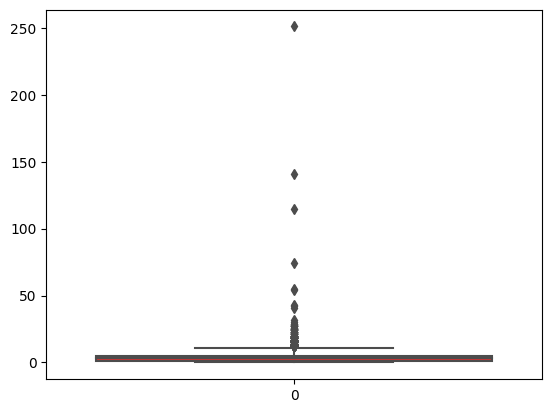

In [131]:
sns.boxplot(lead_data['TotalVisits'],orient='vert',palette='Set1')

Observation: there are a number of outliers in the data. We will cap the outliers to 95% value for analysis

In [132]:
percentiles = lead_data['TotalVisits'].quantile([0.05,0.95]).values
lead_data['TotalVisits'][lead_data['TotalVisits'] <= percentiles[0]] = percentiles[0]
lead_data['TotalVisits'][lead_data['TotalVisits'] >= percentiles[1]] = percentiles[1]

<Axes: >

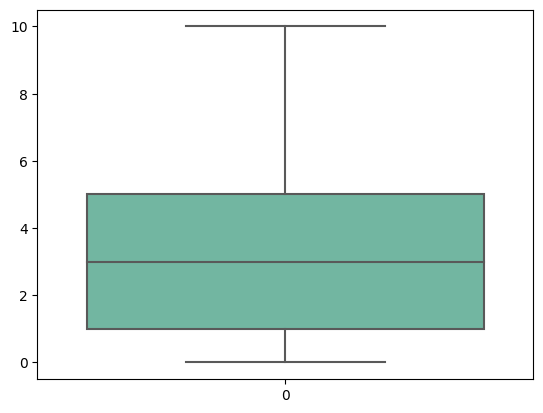

In [133]:
# Visualizing again
sns.boxplot(lead_data['TotalVisits'],orient='vert',palette='Set2')

<Axes: xlabel='Converted', ylabel='TotalVisits'>

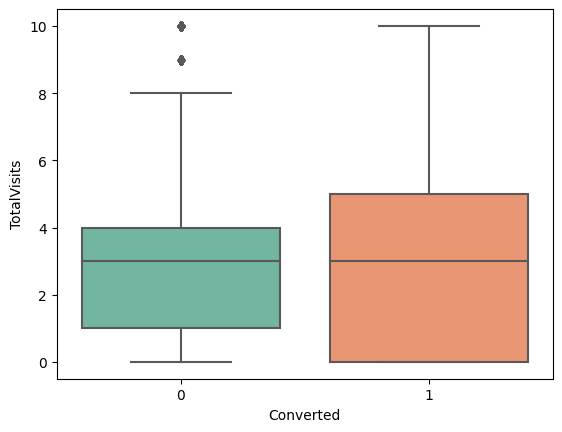

In [134]:
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = lead_data,palette='Set2')

**7) Total Time Spent on Website**

In [135]:
lead_data['Total Time Spent on Website'].describe()

count    9074.000000
mean      482.887481
std       545.256560
min         0.000000
25%        11.000000
50%       246.000000
75%       922.750000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

<Axes: >

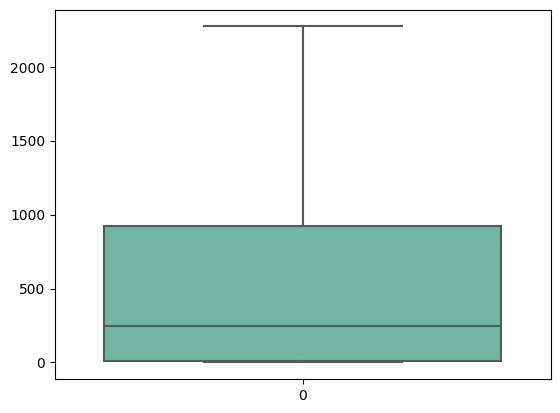

In [136]:
sns.boxplot(lead_data['Total Time Spent on Website'],orient='vert',palette='Set2')

<Axes: xlabel='Converted', ylabel='Total Time Spent on Website'>

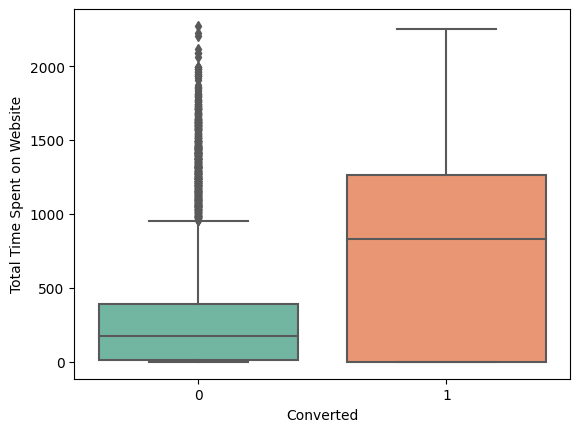

In [137]:
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = lead_data,palette='Set2')

Leads spending more time on the weblise are more likely to be converted.

Insight:
Website should be made more engaging to make leads spend more time.

### 8) Page Views Per Visit

In [138]:
lead_data['Page Views Per Visit'].describe()

count    9074.000000
mean        2.370151
std         2.160871
min         0.000000
25%         1.000000
50%         2.000000
75%         3.200000
max        55.000000
Name: Page Views Per Visit, dtype: float64

<Axes: >

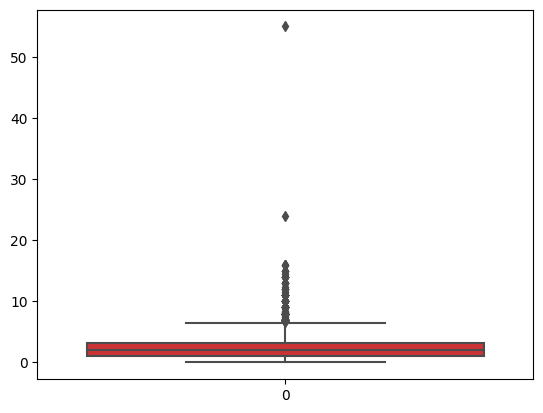

In [139]:
sns.boxplot(lead_data['Page Views Per Visit'],orient='vert',palette='Set1')

**As we can see there are a number of outliers in the data.
So we will cap the outliers to 95% value for analysis.**

In [140]:
percentiles = lead_data['Page Views Per Visit'].quantile([0.05,0.95]).values
lead_data['Page Views Per Visit'][lead_data['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
lead_data['Page Views Per Visit'][lead_data['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]


<Axes: >

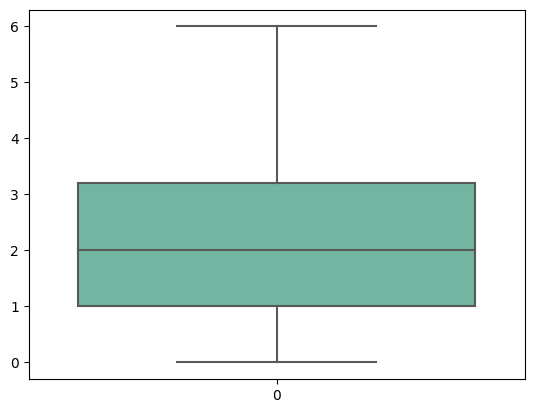

In [141]:
# Visualizing again
sns.boxplot(lead_data['Page Views Per Visit'],palette='Set2',orient='vert')

<Axes: xlabel='Converted', ylabel='Page Views Per Visit'>

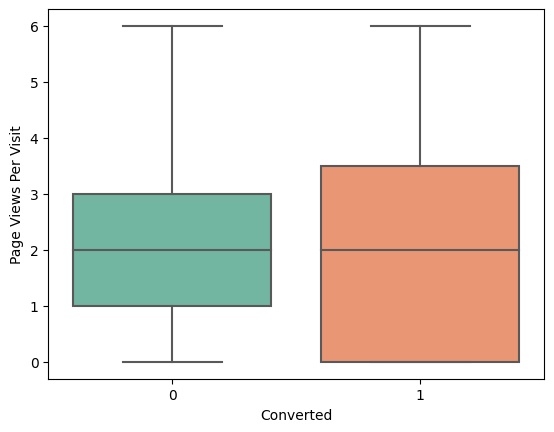

In [142]:
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data =lead_data,palette='Set2')

### Inference
* Median for converted and unconverted leads is the same.

**Nothing can be said specifically for lead conversion from Page Views Per Visit**

### 9) Last Activity

In [143]:
lead_data['Last Activity'].describe()

count             9074
unique              17
top       Email Opened
freq              3432
Name: Last Activity, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'Page Visited on Website'),
  Text(1, 0, 'Email Opened'),
  Text(2, 0, 'Unreachable'),
  Text(3, 0, 'Converted to Lead'),
  Text(4, 0, 'Olark Chat Conversation'),
  Text(5, 0, 'Email Bounced'),
  Text(6, 0, 'Email Link Clicked'),
  Text(7, 0, 'Form Submitted on Website'),
  Text(8, 0, 'Unsubscribed'),
  Text(9, 0, 'Had a Phone Conversation'),
  Text(10, 0, 'View in browser link Clicked'),
  Text(11, 0, 'SMS Sent'),
  Text(12, 0, 'Visited Booth in Tradeshow'),
  Text(13, 0, 'Approached upfront'),
  Text(14, 0, 'Resubscribed to emails'),
  Text(15, 0, 'Email Received'),
  Text(16, 0, 'Email Marked Spam')])

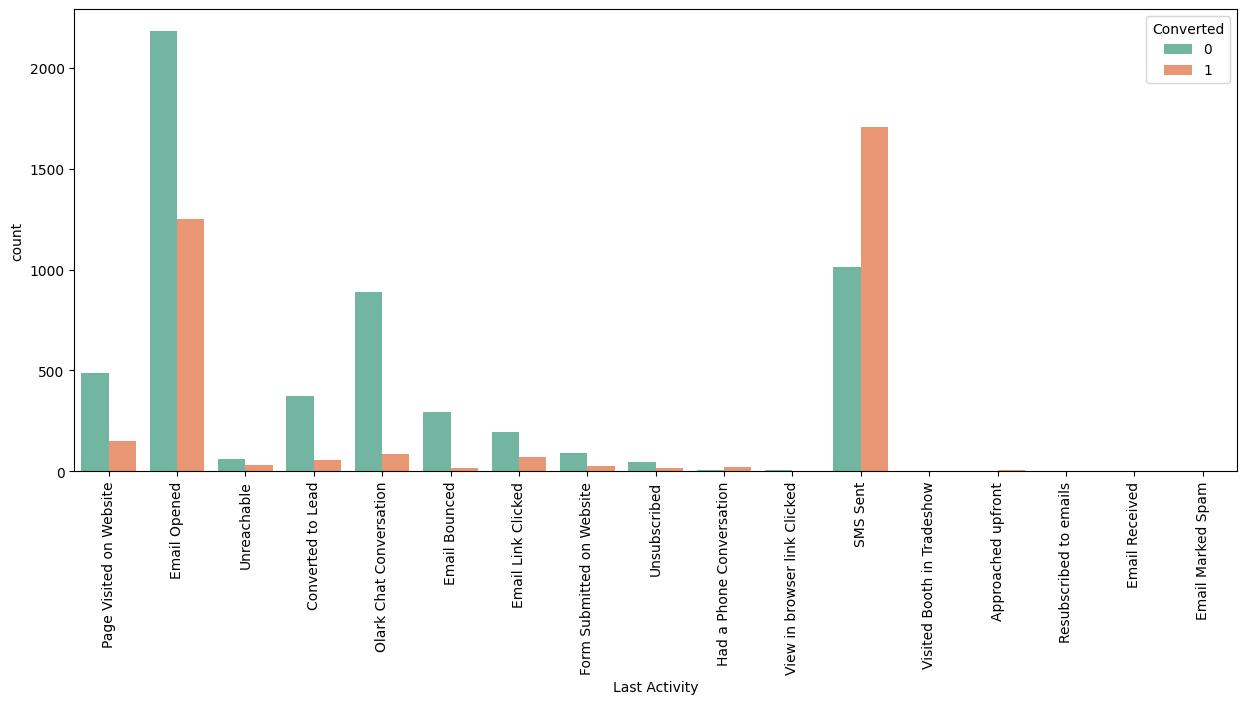

In [144]:
plt.figure(figsize=(15,6))
sns.countplot(x = "Last Activity", hue = "Converted", data = lead_data,palette='Set2')
plt.xticks(rotation = 90)

In [145]:
# We can club the last activities to "Other_Activity" which are having less data.
lead_data['Last Activity'] = lead_data['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked',
                                                       'Visited Booth in Tradeshow', 'Approached upfront',
                                                       'Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Other_Activity')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Page Visited on Website'),
  Text(1, 0, 'Email Opened'),
  Text(2, 0, 'Unreachable'),
  Text(3, 0, 'Converted to Lead'),
  Text(4, 0, 'Olark Chat Conversation'),
  Text(5, 0, 'Email Bounced'),
  Text(6, 0, 'Email Link Clicked'),
  Text(7, 0, 'Form Submitted on Website'),
  Text(8, 0, 'Unsubscribed'),
  Text(9, 0, 'Other_Activity'),
  Text(10, 0, 'SMS Sent')])

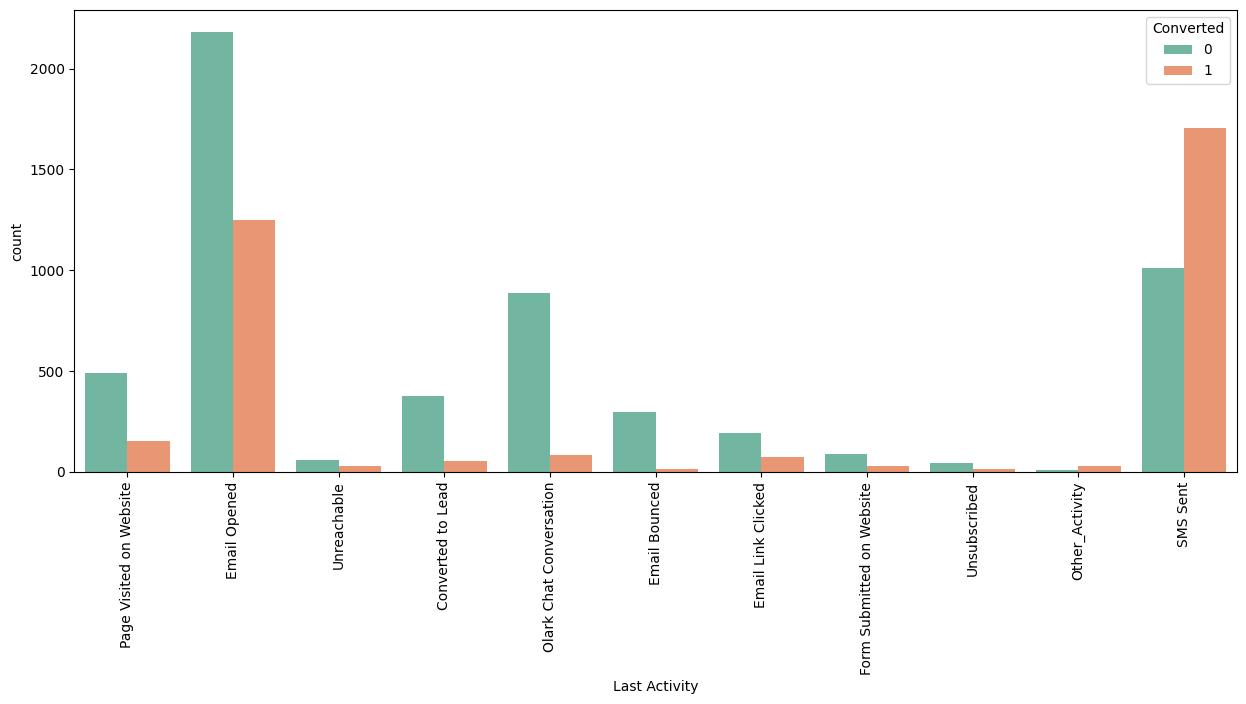

In [146]:
# Visualizing again
plt.figure(figsize=(15,6))
sns.countplot(x = "Last Activity", hue = "Converted", data = lead_data,palette='Set2')
plt.xticks(rotation = 90)

### Inference
1. Most of the lead have their Email opened as their last activity.
2. Conversion rate for leads with last activity as SMS Sent is almost 60%.

### 10) Country

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]),
 [Text(0, 0, 'India'),
  Text(1, 0, 'Russia'),
  Text(2, 0, 'Kuwait'),
  Text(3, 0, 'Oman'),
  Text(4, 0, 'United Arab Emirates'),
  Text(5, 0, 'United States'),
  Text(6, 0, 'Australia'),
  Text(7, 0, 'United Kingdom'),
  Text(8, 0, 'Bahrain'),
  Text(9, 0, 'Ghana'),
  Text(10, 0, 'Singapore'),
  Text(11, 0, 'Qatar'),
  Text(12, 0, 'Saudi Arabia'),
  Text(13, 0, 'Belgium'),
  Text(14, 0, 'France'),
  Text(15, 0, 'Sri Lanka'),
  Text(16, 0, 'China'),
  Text(17, 0, 'Canada'),
  Text(18, 0, 'Netherlands'),
  Text(19, 0, 'Sweden'),
  Text(20, 0, 'Nigeria'),
  Text(21, 0, 'Hong Kong'),
  Text(22, 0, 'Germany'),
  Text(23, 0, 'Asia/Pacific Region'),
  Text(24, 0, 'Uganda'),
  Text(25, 0, 'Kenya'),
  Text(26, 0, 'Italy'),
  Text(27, 0, 'South Africa'),
  Text(28, 0, 'Tanzania'),
  Text(29, 0, 'unknown'),
  Text(30, 0

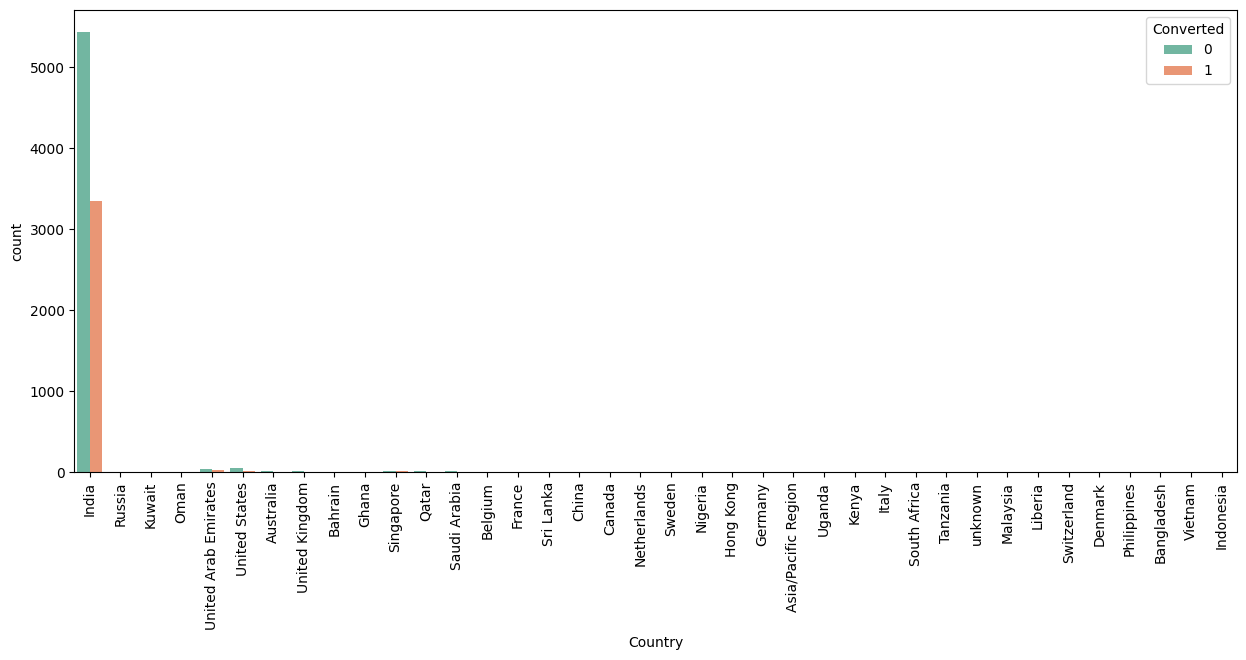

In [147]:
plt.figure(figsize=(15,6))
sns.countplot(x = "Country", hue = "Converted", data = lead_data,palette='Set2')
plt.xticks(rotation = 90)

### Inference
**Most values are 'India' no such inference can be drawn**

### Inference
**Focus should be more on the Specialization with high conversion rate.**

### 11) What is your current occupation

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Unemployed'),
  Text(1, 0, 'Student'),
  Text(2, 0, 'Working Professional'),
  Text(3, 0, 'Businessman'),
  Text(4, 0, 'Other'),
  Text(5, 0, 'Housewife')])

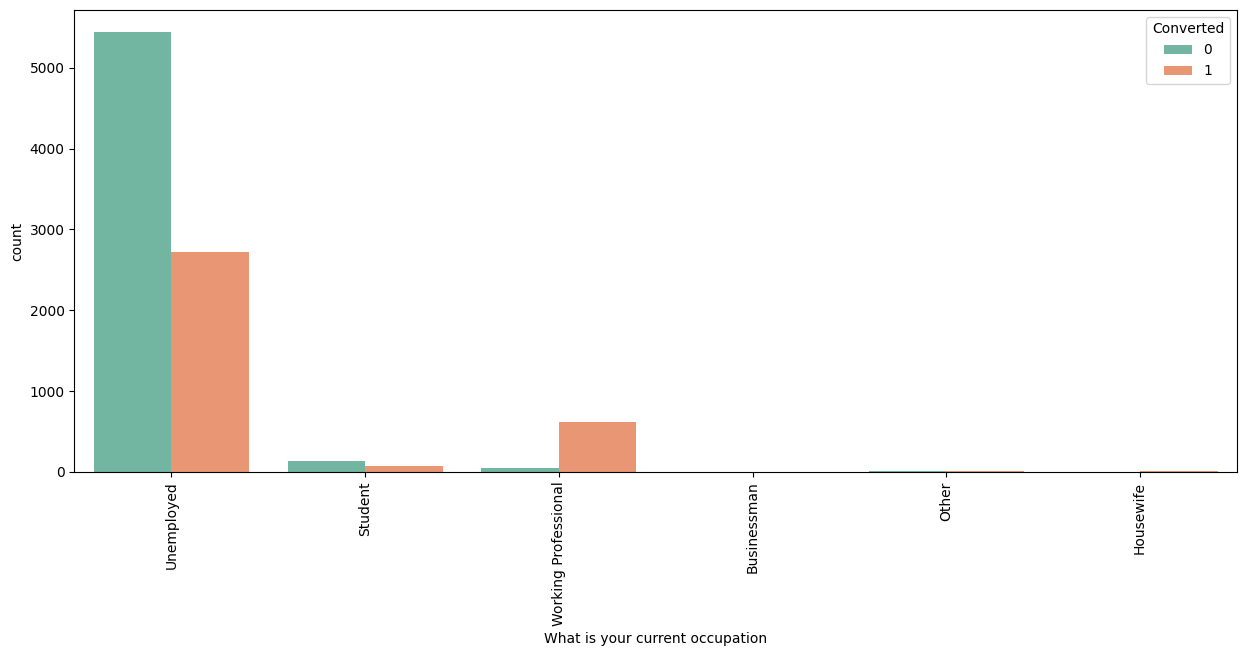

In [148]:
plt.figure(figsize=(15,6))
sns.countplot(x = "What is your current occupation", hue = "Converted", data = lead_data,palette='Set2')
plt.xticks(rotation = 90)

### Inference
1. Working Professionals going for the course have high chances of joining it.
2. Unemployed leads are the most in numbers but has around 30-35% conversion rate.

### 12) Search

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

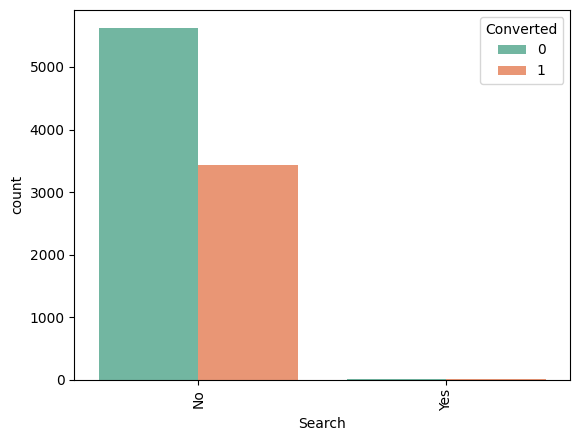

In [149]:
sns.countplot(x = "Search", hue = "Converted", data = lead_data,palette='Set2')
plt.xticks(rotation = 90)

### Inference
Most entries are 'No'. No Inference can be drawn with this parameter.

### 14) Magazine

(array([0]), [Text(0, 0, 'No')])

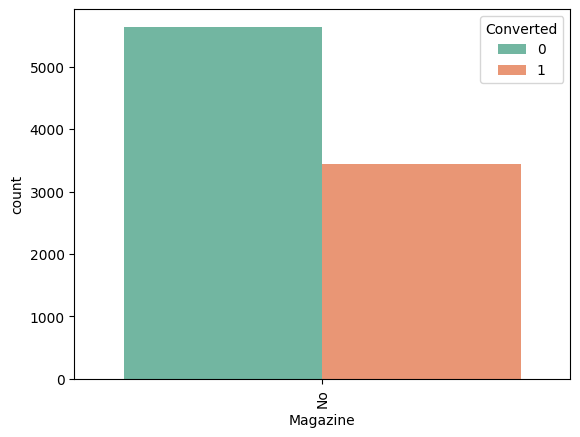

In [150]:
sns.countplot(x = "Magazine", hue = "Converted", data = lead_data,palette='Set2')
plt.xticks(rotation = 90)

### Insight
Most entries are 'No'. No Inference can be drawn with this parameter.

### 15) Newspaper Article

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

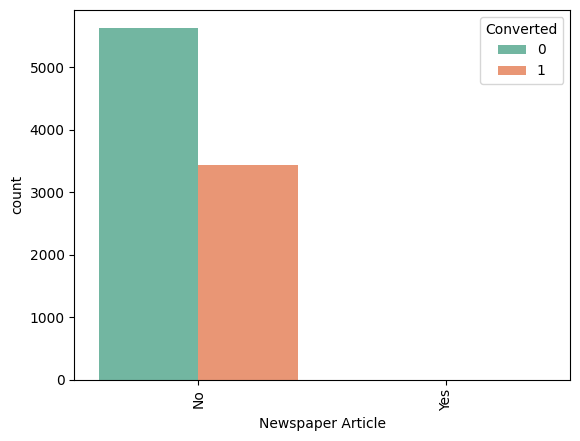

In [151]:
sns.countplot(x = "Newspaper Article", hue = "Converted", data = lead_data,palette='Set2')
plt.xticks(rotation = 90)

### Inference
Most entries are 'No'. No Inference can be drawn with this parameter.

### 16) X Education Forums

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

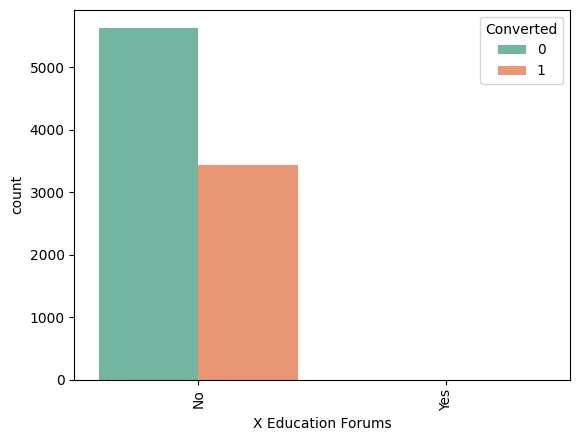

In [152]:
sns.countplot(x = "X Education Forums", hue = "Converted", data = lead_data,palette='Set2')
plt.xticks(rotation = 90)

### Insight
Most entries are 'No'. No Inference can be drawn with this parameter.

### 17) Newspaper

<Axes: xlabel='Newspaper', ylabel='count'>

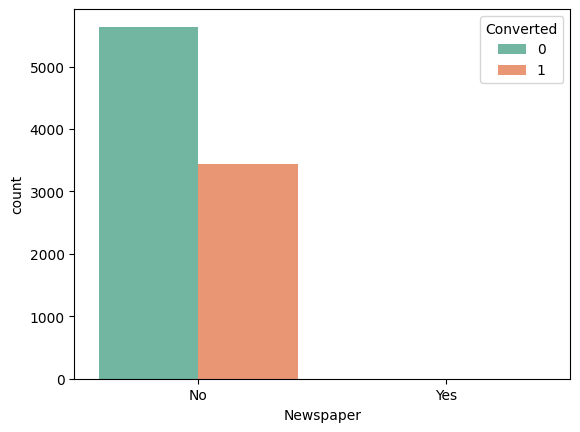

In [153]:
sns.countplot(x = "Newspaper", hue = "Converted", data = lead_data,palette='Set2')


### Insight
Most entries are 'No'. No Inference can be drawn with this parameter.

### 18) Digital Advertisement

<Axes: xlabel='Digital Advertisement', ylabel='count'>

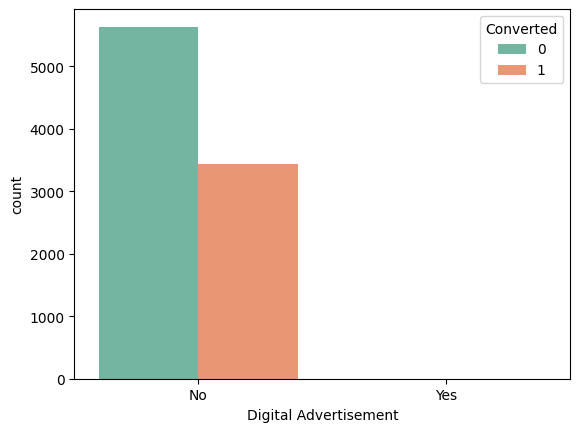

In [154]:
sns.countplot(x = "Digital Advertisement", hue = "Converted", data = lead_data,palette='Set2')


#Insight
Most entries are 'No'. No Inference can be drawn with this parameter.

### 19) Through Recommendations

<Axes: xlabel='Through Recommendations', ylabel='count'>

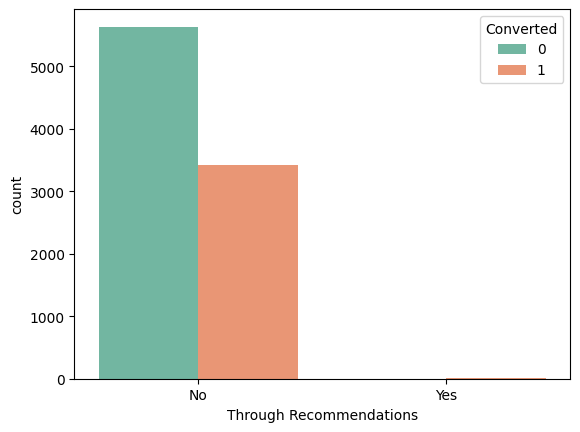

In [155]:
sns.countplot(x = "Through Recommendations", hue = "Converted", data = lead_data,palette='Set2')


### Inference
Most entries are 'No'. No Inference can be drawn with this parameter.

### 20) Receive More Updates About Our Courses

<Axes: xlabel='Receive More Updates About Our Courses', ylabel='count'>

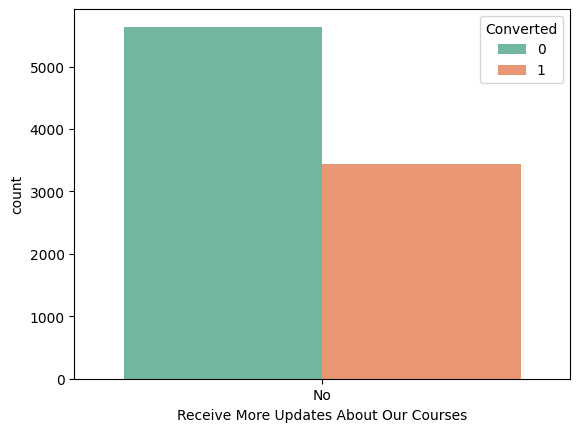

In [156]:
sns.countplot(x = "Receive More Updates About Our Courses", hue = "Converted", data = lead_data,palette='Set2')


### Inference
Most entries are 'No'. No Inference can be drawn with this parameter.

### 20) Update me on Supply Chain Content

<Axes: xlabel='Update me on Supply Chain Content', ylabel='count'>

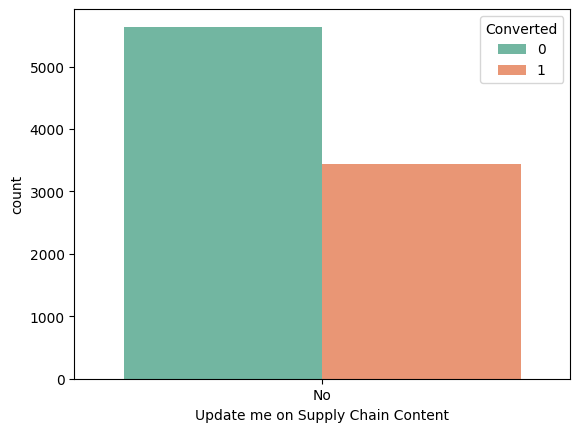

In [157]:
sns.countplot(x = "Update me on Supply Chain Content", hue = "Converted", data = lead_data,palette='Set2')


### Inference
Most entries are 'No'. No Inference can be drawn with this parameter.

### 25) I agree to pay the amount through cheque

(array([0]), [Text(0, 0, 'No')])

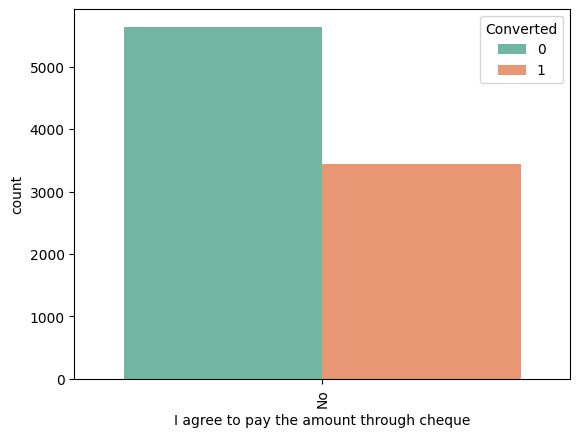

In [158]:
sns.countplot(x = "I agree to pay the amount through cheque", hue = "Converted", data = lead_data,palette='Set2')
plt.xticks(rotation = 90)

### Inference
Most entries are 'No'. No Inference can be drawn with this parameter.

### 27) Last Notable Activity

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Modified'),
  Text(1, 0, 'Email Opened'),
  Text(2, 0, 'Page Visited on Website'),
  Text(3, 0, 'Email Bounced'),
  Text(4, 0, 'Email Link Clicked'),
  Text(5, 0, 'Unreachable'),
  Text(6, 0, 'Unsubscribed'),
  Text(7, 0, 'Had a Phone Conversation'),
  Text(8, 0, 'Olark Chat Conversation'),
  Text(9, 0, 'SMS Sent'),
  Text(10, 0, 'Approached upfront'),
  Text(11, 0, 'Resubscribed to emails'),
  Text(12, 0, 'View in browser link Clicked'),
  Text(13, 0, 'Form Submitted on Website'),
  Text(14, 0, 'Email Received'),
  Text(15, 0, 'Email Marked Spam')])

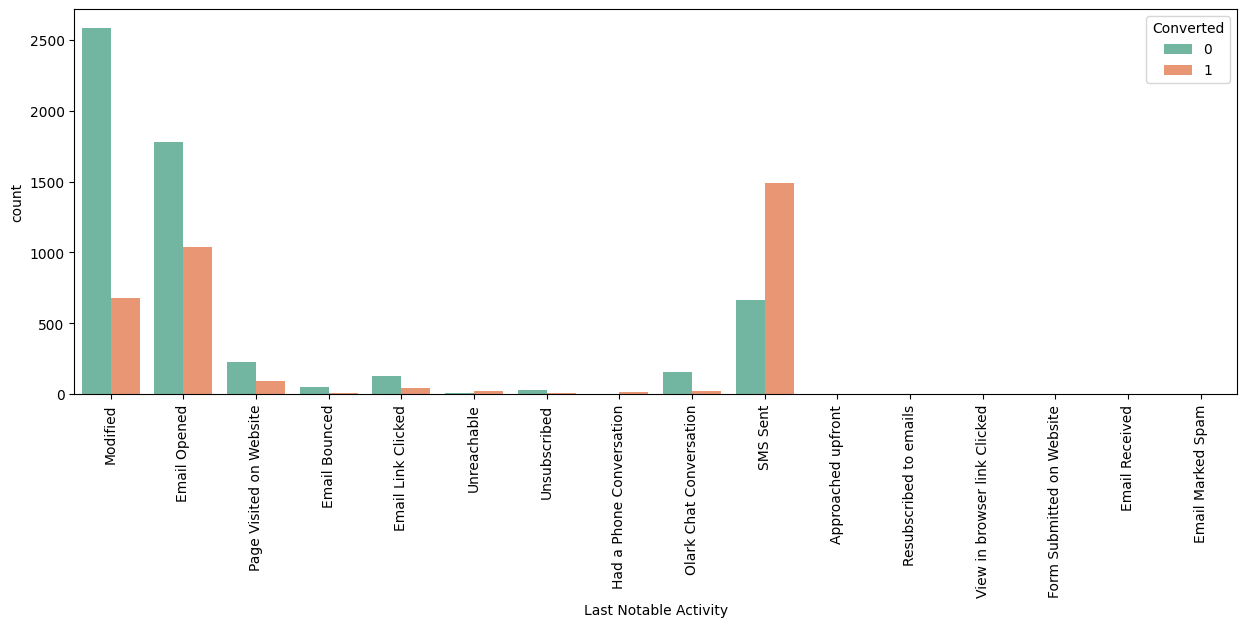

In [159]:
plt.figure(figsize=(15,5))
sns.countplot(x = "Last Notable Activity", hue = "Converted", data = lead_data,palette='Set2')
plt.xticks(rotation = 90)

### Results
**Based on the univariate analysis we have seen that many columns are not adding any information to the model, hence we can drop them for further analysis**

In [160]:
lead_data.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'What is your current occupation', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [161]:
lead_data = lead_data.drop(['Lead Number','Country','Search','Magazine','Newspaper Article','X Education Forums',
                            'Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                            'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque',
                            'A free copy of Mastering The Interview'],1)

In [162]:
lead_data.shape

(9074, 12)

In [163]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Prospect ID                      9074 non-null   object 
 1   Lead Origin                      9074 non-null   object 
 2   Lead Source                      9074 non-null   object 
 3   Do Not Email                     9074 non-null   object 
 4   Do Not Call                      9074 non-null   object 
 5   Converted                        9074 non-null   int64  
 6   TotalVisits                      9074 non-null   float64
 7   Total Time Spent on Website      9074 non-null   int64  
 8   Page Views Per Visit             9074 non-null   float64
 9   Last Activity                    9074 non-null   object 
 10  What is your current occupation  9074 non-null   object 
 11  Last Notable Activity            9074 non-null   object 
dtypes: float64(2), int64

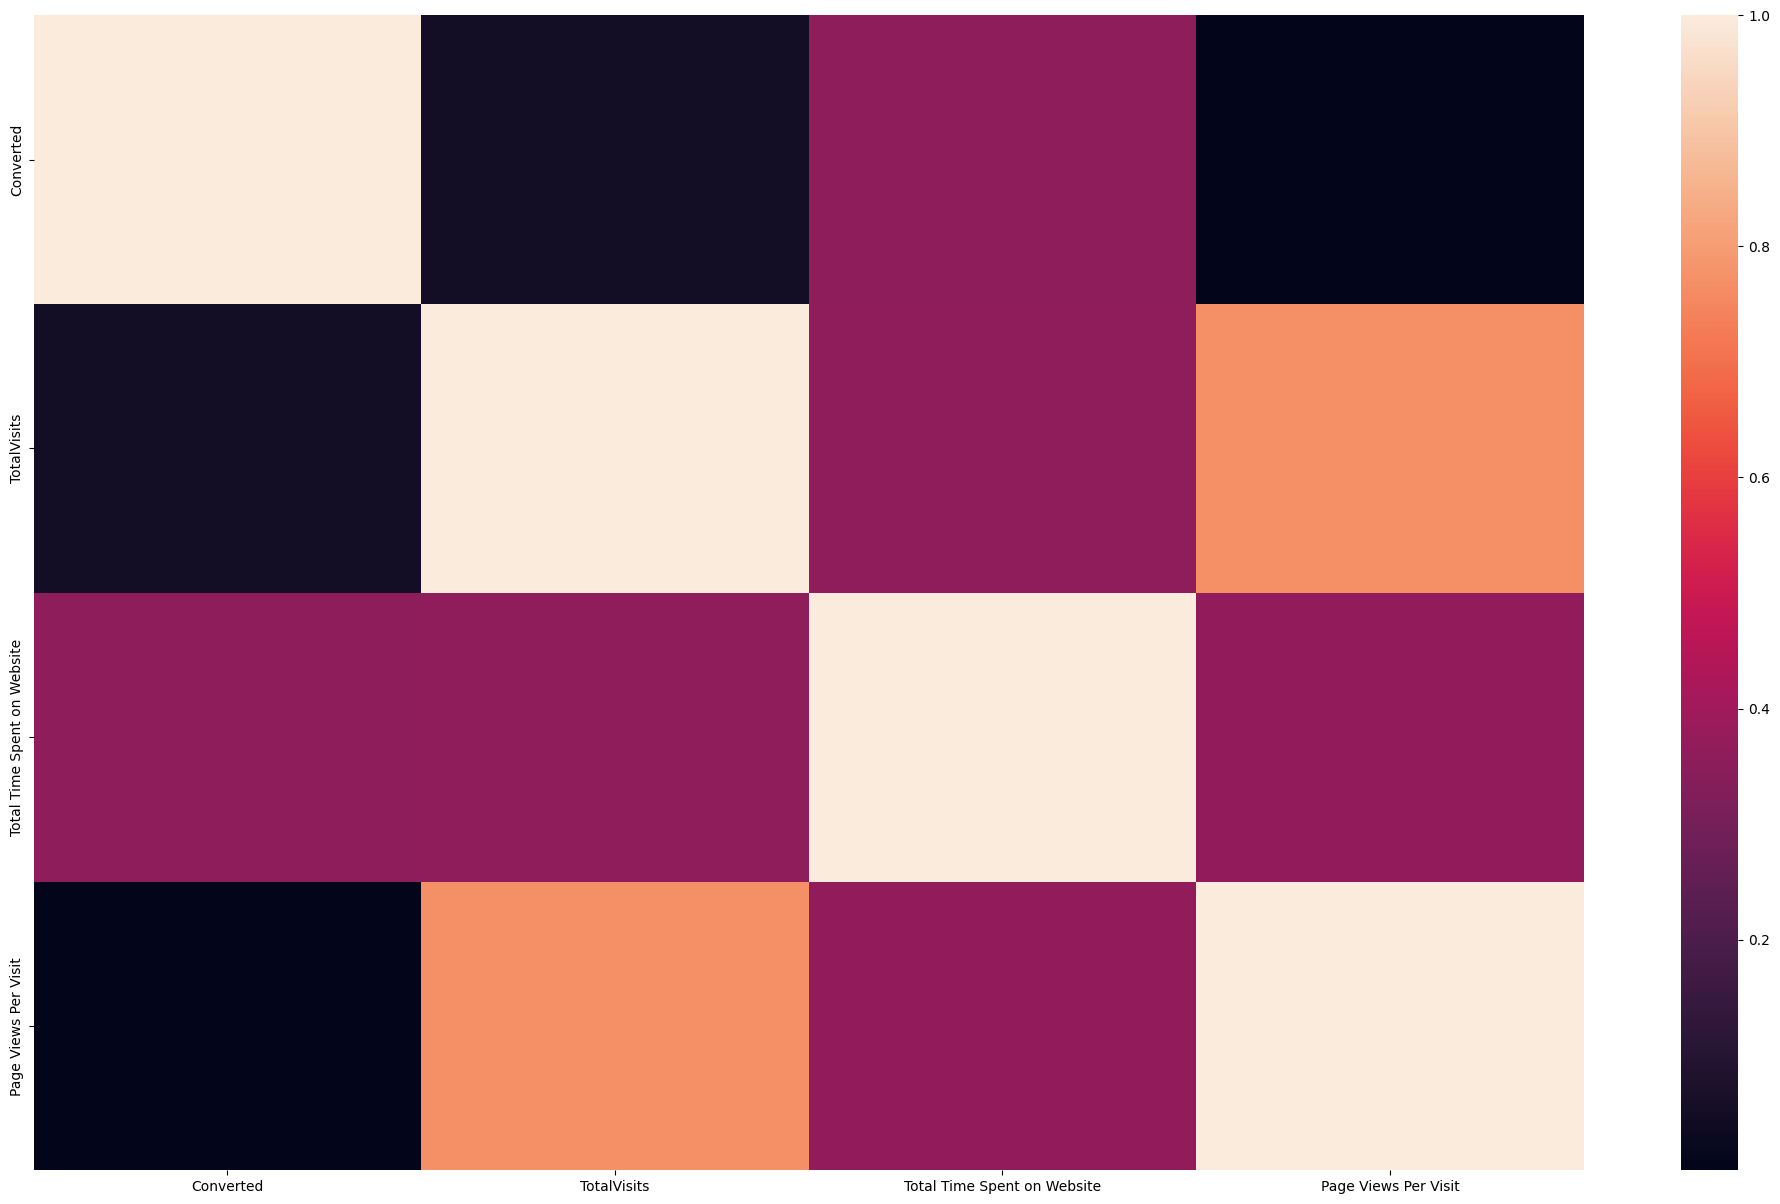

In [164]:
# Looking at the correlation table
plt.figure(figsize = (25,15))
sns.heatmap(lead_data.corr())
plt.show()

## Data Preparation

### 1) Converting some binary variables (Yes/No) to 1/0

In [165]:
vars =  ['Do Not Email', 'Do Not Call']

def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

lead_data[vars] = lead_data[vars].apply(binary_map)

### 2) Creating Dummy variables for the categorical features:
'Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation','City','Last Notable Activity'

In [166]:
# Creating a dummy variable for the categorical variables and dropping the first one.
dummy_data = pd.get_dummies(lead_data[['Lead Origin', 'Lead Source', 'Last Activity','What is your current occupation',
                            'Last Notable Activity']], drop_first=True)
dummy_data.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [167]:
# Concatenating the dummy_data to the lead_data dataframe
lead_data = pd.concat([lead_data, dummy_data], axis=1)
lead_data.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,...,0,0,1,0,0,0,0,0,0,0


**Dropping the columns for which dummies were created**

In [168]:
lead_data = lead_data.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'What is your current occupation',
                             'Last Notable Activity'], axis = 1)

In [169]:
lead_data.head()

,Prospect ID,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0,0.0,0,0.0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,0,5.0,674,2.5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,0,1,2.0,1532,2.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,0,1.0,305,1.0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,0,0,1,2.0,1428,1.0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


### 3) Splitting the data into  train and test set.

In [170]:
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = lead_data.drop(['Prospect ID','Converted'], axis=1)
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [171]:
# Putting target variable to y
y = lead_data['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [172]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### 4)  Scaling the features

In [173]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0,0,-0.432779,-0.160255,-0.155018,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1012,1,0,-0.432779,-0.540048,-0.155018,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9226,0,0,-1.150329,-0.888650,-1.265540,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4750,0,0,-0.432779,1.643304,-0.155018,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7987,0,0,0.643547,2.017593,0.122613,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [174]:
# Checking the Lead Conversion rate
Converted = (sum(lead_data['Converted'])/len(lead_data['Converted'].index))*100
Converted

37.85541106458012

We have almost 38% lead conversion rate.

In [175]:
# Import 'LogisticRegression' and create a LogisticRegression object

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [176]:
# Import RFE and select 15 variables

from sklearn.feature_selection import RFE
rfe = RFE(logreg)
rfe = rfe.fit(X_train, y_train)

## Feature Selection Using RFE

In [177]:

rfe = RFE(logreg)
# running RFE with 20 variables as output
rfe = rfe.fit(X_train, y_train)

In [178]:
rfe.support_

array([ True,  True, False,  True, False, False,  True,  True, False,
       False,  True, False, False,  True, False,  True, False, False,
       False, False,  True,  True, False,  True, False,  True,  True,
       False,  True,  True,  True, False,  True, False,  True, False,
       False,  True,  True,  True,  True, False, False,  True, False,
       False])

In [179]:
# Let's take a look at which features have been selected by RFE

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', True, 1),
 ('TotalVisits', False, 11),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 12),
 ('Lead Origin_Landing Page Submission', False, 19),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Facebook', False, 8),
 ('Lead Source_Google', False, 10),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 24),
 ('Lead Source_Others', False, 9),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 20),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 3),
 ('Last Activity_Email Link Clicked', False, 15),
 ('Last Activity_Email Opened', False, 2),
 ('Last Activity_Form Submitted on Website', False, 17),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Other_Activity', True, 1),
 ('Last Activity_Page Visited on Website', False, 16),
 ('Last Activity_SMS Sent', True, 1),
 ('

In [180]:
# Viewing columns selected by RFE
cols = X_train.columns[rfe.support_]
cols

Index(['Do Not Email', 'Do Not Call', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Other_Activity', 'Last Activity_SMS Sent',
       'Last Activity_Unsubscribed',
       'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website',
       'Last Notable Activity_Unreachable'],
      dtype='object')

Now you have all the variables selected by RFE and since we care about the statistics part, i.e. the p-values and the VIFs, let's use these variables to create a logistic regression model using statsmodels.

## Model Building

### Assessing the model with StatsModels

### Model-1

In [181]:
import statsmodels.api as sm

In [182]:
X_train_sm = sm.add_constant(X_train[cols])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm1.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6327
Model Family:                Binomial   Df Model:                           23
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2624.4
Date:                Sat, 08 Jul 2023   Deviance:                       5248.8
Time:                        06:51:33   Pearson chi2:                 6.37e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3975
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.7353      0.626      1.175      0.240      -0.492       1.962
Do Not Email                                            -1.8015      0.191     -9.418      0.000      -2.176      -1.427
Do Not Call                                             22.4878   3.39e+04      0.001      0.999   -6.65e+04    6.65e+04
Total Time Spent on Website                              1.1373      0.041     27.996      0.000       1.058       1.217
Lead Origin_Lead Add Form                                2.2282      0.947      2.352      0.019       0.372       4.085
Lead Origin_Lead Import                                  1.5475      0.458      3.376      0.001       0.649       2.446
Lead Source_Olark Chat                                   1.2709      0.105     12.121      0.000       1.065       1.476
Lead Source_Reference                                    1.7507      0.972      1.802      0.072      -0.154       3.655
Lead Source_Welingak Website                             3.7664      1.192      3.161      0.002       1.431       6.102
Last Activity_Olark Chat Conversation                   -0.9484      0.196     -4.827      0.000      -1.333      -0.563
Last Activity_Other_Activity                             1.6460      0.551      2.989      0.003       0.567       2.725
Last Activity_SMS Sent                                   0.8015      0.149      5.379      0.000       0.509       1.094
Last Activity_Unsubscribed                               1.0050      0.494      2.034      0.042       0.037       1.973
What is your current occupation_Housewife               21.5015   1.58e+04      0.001      0.999   -3.09e+04     3.1e+04
What is your current occupation_Student                 -0.9403      0.646     -1.456      0.145      -2.206       0.325
What is your current occupation_Unemployed              -1.3645      0.607     -2.247      0.025      -2.555      -0.174
What is your current occupation_Working Professional     1.3826      0.633      2.184      0.029       0.142       2.624
Last Notable Activity_Email Link Clicked                -1.0868      0.295     -3.689      0.000      -1.664      -0.509
Last Notable Activity_Email Opened                      -0.6252      0.172     -3.643      0.000      -0.962      -0.289
Last Notable Activity_Had a Phone Conversation           1.2085      1.228      0.984      0.325      -1.198       3.615
Last Notable Activity_Modified                          -1.3516      0.140     -9.633      0.000      -1.627      -1.077
Last Notable Activity_Olark Chat Conversation           -1.1240      0.383     -2.937      0.003      -1.874      -0.374
Last Notable Activity_Page Visited on Website           -0

Since Pvalue of 'What is your current occupation_Housewife' is very high, we can drop this column.

In [183]:
# Dropping the column 'What is your current occupation_Housewife'
col1 = cols.drop('What is your current occupation_Housewife')

### Model-2

In [184]:
X_train_sm = sm.add_constant(X_train[col1])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6328
Model Family:                Binomial   Df Model:                           22
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2626.1
Date:                Sat, 08 Jul 2023   Deviance:                       5252.2
Time:                        06:51:33   Pearson chi2:                 6.38e+03
No. Iterations:                    19   Pseudo R-squ. (CS):             0.3971
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.1444      0.578      1.980      0.048       0.012       2.277
Do Not Email                                            -1.8038      0.191     -9.420      0.000      -2.179      -1.428
Do Not Call                                             20.4890   1.25e+04      0.002      0.999   -2.45e+04    2.45e+04
Total Time Spent on Website                              1.1363      0.041     27.992      0.000       1.057       1.216
Lead Origin_Lead Add Form                                2.2276      0.947      2.352      0.019       0.371       4.084
Lead Origin_Lead Import                                  1.5451      0.458      3.371      0.001       0.647       2.444
Lead Source_Olark Chat                                   1.2690      0.105     12.105      0.000       1.064       1.474
Lead Source_Reference                                    1.7548      0.972      1.806      0.071      -0.150       3.659
Lead Source_Welingak Website                             3.7663      1.192      3.161      0.002       1.431       6.102
Last Activity_Olark Chat Conversation                   -0.9480      0.197     -4.821      0.000      -1.333      -0.563
Last Activity_Other_Activity                             1.6486      0.551      2.994      0.003       0.569       2.728
Last Activity_SMS Sent                                   0.8031      0.149      5.388      0.000       0.511       1.095
Last Activity_Unsubscribed                               1.0091      0.494      2.042      0.041       0.041       1.978
What is your current occupation_Student                 -1.3510      0.599     -2.254      0.024      -2.526      -0.176
What is your current occupation_Unemployed              -1.7747      0.558     -3.181      0.001      -2.868      -0.681
What is your current occupation_Working Professional     0.9723      0.586      1.660      0.097      -0.176       2.120
Last Notable Activity_Email Link Clicked                -1.0824      0.294     -3.678      0.000      -1.659      -0.506
Last Notable Activity_Email Opened                      -0.6216      0.172     -3.621      0.000      -0.958      -0.285
Last Notable Activity_Had a Phone Conversation           1.2067      1.228      0.983      0.326      -1.199       3.613
Last Notable Activity_Modified                          -1.3528      0.140     -9.638      0.000      -1.628      -1.078
Last Notable Activity_Olark Chat Conversation           -1.1217      0.383     -2.931      0.003      -1.872      -0.372
Last Notable Activity_Page Visited on Website           -0.8881      0.249     -3.560      0.000      -1.377      -0.399
Last Notable Activity_Unreachable                        1

Since Pvalue of 'Last Notable Activity_Had a Phone Conversation' is very high (0.326), we can drop this column.

In [185]:
col1 = col1.drop('Last Notable Activity_Had a Phone Conversation')

### Model-3

In [186]:
X_train_sm = sm.add_constant(X_train[col1])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6329
Model Family:                Binomial   Df Model:                           21
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2626.6
Date:                Sat, 08 Jul 2023   Deviance:                       5253.3
Time:                        06:51:33   Pearson chi2:                 6.38e+03
No. Iterations:                    19   Pseudo R-squ. (CS):             0.3970
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.1614      0.578      2.011      0.044       0.029       2.293
Do Not Email                                            -1.8088      0.192     -9.439      0.000      -2.184      -1.433
Do Not Call                                             20.4884   1.25e+04      0.002      0.999   -2.44e+04    2.45e+04
Total Time Spent on Website                              1.1355      0.041     27.981      0.000       1.056       1.215
Lead Origin_Lead Add Form                                2.2259      0.947      2.350      0.019       0.369       4.083
Lead Origin_Lead Import                                  1.5453      0.458      3.371      0.001       0.647       2.444
Lead Source_Olark Chat                                   1.2655      0.105     12.077      0.000       1.060       1.471
Lead Source_Reference                                    1.7552      0.972      1.806      0.071      -0.149       3.660
Lead Source_Welingak Website                             3.7691      1.192      3.163      0.002       1.433       6.105
Last Activity_Olark Chat Conversation                   -0.9466      0.197     -4.814      0.000      -1.332      -0.561
Last Activity_Other_Activity                             1.9444      0.477      4.075      0.000       1.009       2.880
Last Activity_SMS Sent                                   0.7906      0.149      5.317      0.000       0.499       1.082
Last Activity_Unsubscribed                               1.0005      0.494      2.025      0.043       0.032       1.969
What is your current occupation_Student                 -1.3516      0.599     -2.255      0.024      -2.526      -0.177
What is your current occupation_Unemployed              -1.7750      0.558     -3.182      0.001      -2.868      -0.682
What is your current occupation_Working Professional     0.9702      0.586      1.657      0.098      -0.178       2.118
Last Notable Activity_Email Link Clicked                -1.0978      0.294     -3.734      0.000      -1.674      -0.522
Last Notable Activity_Email Opened                      -0.6374      0.171     -3.726      0.000      -0.973      -0.302
Last Notable Activity_Modified                          -1.3687      0.140     -9.800      0.000      -1.642      -1.095
Last Notable Activity_Olark Chat Conversation           -1.1374      0.382     -2.974      0.003      -1.887      -0.388
Last Notable Activity_Page Visited on Website           -0.9038      0.249     -3.629      0.000      -1.392      -0.416
Last Notable Activity_Unreachable                        1.0159      0.500      2.033      0.042       0.036       1.995
==========================================================

### Model-4

In [187]:
X_train_sm = sm.add_constant(X_train[col1])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6329
Model Family:                Binomial   Df Model:                           21
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2626.6
Date:                Sat, 08 Jul 2023   Deviance:                       5253.3
Time:                        06:51:45   Pearson chi2:                 6.38e+03
No. Iterations:                    19   Pseudo R-squ. (CS):             0.3970
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.1614      0.578      2.011      0.044       0.029       2.293
Do Not Email                                            -1.8088      0.192     -9.439      0.000      -2.184      -1.433
Do Not Call                                             20.4884   1.25e+04      0.002      0.999   -2.44e+04    2.45e+04
Total Time Spent on Website                              1.1355      0.041     27.981      0.000       1.056       1.215
Lead Origin_Lead Add Form                                2.2259      0.947      2.350      0.019       0.369       4.083
Lead Origin_Lead Import                                  1.5453      0.458      3.371      0.001       0.647       2.444
Lead Source_Olark Chat                                   1.2655      0.105     12.077      0.000       1.060       1.471
Lead Source_Reference                                    1.7552      0.972      1.806      0.071      -0.149       3.660
Lead Source_Welingak Website                             3.7691      1.192      3.163      0.002       1.433       6.105
Last Activity_Olark Chat Conversation                   -0.9466      0.197     -4.814      0.000      -1.332      -0.561
Last Activity_Other_Activity                             1.9444      0.477      4.075      0.000       1.009       2.880
Last Activity_SMS Sent                                   0.7906      0.149      5.317      0.000       0.499       1.082
Last Activity_Unsubscribed                               1.0005      0.494      2.025      0.043       0.032       1.969
What is your current occupation_Student                 -1.3516      0.599     -2.255      0.024      -2.526      -0.177
What is your current occupation_Unemployed              -1.7750      0.558     -3.182      0.001      -2.868      -0.682
What is your current occupation_Working Professional     0.9702      0.586      1.657      0.098      -0.178       2.118
Last Notable Activity_Email Link Clicked                -1.0978      0.294     -3.734      0.000      -1.674      -0.522
Last Notable Activity_Email Opened                      -0.6374      0.171     -3.726      0.000      -0.973      -0.302
Last Notable Activity_Modified                          -1.3687      0.140     -9.800      0.000      -1.642      -1.095
Last Notable Activity_Olark Chat Conversation           -1.1374      0.382     -2.974      0.003      -1.887      -0.388
Last Notable Activity_Page Visited on Website           -0.9038      0.249     -3.629      0.000      -1.392      -0.416
Last Notable Activity_Unreachable                        1.0159      0.500      2.033      0.042       0.036       1.995
==========================================================

In [ ]:
X_train_sm = sm.add_constant(X_train[col1])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

### Checking for VIF values:

In [188]:
# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Origin_Lead Add Form,62.43
6,Lead Source_Reference,48.10
13,What is your current occupation_Unemployed,18.33
7,Lead Source_Welingak Website,15.47
16,Last Notable Activity_Email Opened,7.02
17,Last Notable Activity_Modified,5.68
10,Last Activity_SMS Sent,5.30
14,What is your current occupation_Working Profes...,2.50
8,Last Activity_Olark Chat Conversation,2.02
5,Lead Source_Olark Chat,1.77


In [189]:
# Dropping the column  'What is your current occupation_Unemployed' because it has high VIF
col1 = col1.drop('What is your current occupation_Unemployed')

In [190]:
# Dropping the column  'Lead Origin_Lead Add Form' because it has high VIF
col1 = col1.drop('Lead Origin_Lead Add Form')

In [191]:

# Dropping the column  'Lead Source_Reference' because it has high VIF
col1 = col1.drop('Lead Source_Reference')

In [ ]:

# Dropping the column  'Lead Source_Welingak Website' because it has high VIF
col1 = col1.drop('Lead Source_Welingak Websitec')

### Model-5

In [195]:
X_train_sm = sm.add_constant(X_train[col1])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6332
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2892.7
Date:                Sat, 08 Jul 2023   Deviance:                       5785.5
Time:                        07:07:05   Pearson chi2:                 6.14e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.3443
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.4121      0.151     -2.727      0.006      -0.708      -0.116
Do Not Email                                            -1.7313      0.177     -9.786      0.000      -2.078      -1.385
Do Not Call                                             23.9617   1.67e+04      0.001      0.999   -3.27e+04    3.28e+04
Total Time Spent on Website                              0.8906      0.036     24.534      0.000       0.819       0.962
Lead Origin_Lead Import                                  1.0060      0.460      2.185      0.029       0.104       1.908
Lead Source_Olark Chat                                   0.7742      0.098      7.892      0.000       0.582       0.966
Lead Source_Welingak Website                             5.4537      0.724      7.528      0.000       4.034       6.874
Last Activity_Olark Chat Conversation                   -0.9992      0.193     -5.180      0.000      -1.377      -0.621
Last Activity_Other_Activity                             1.8903      0.466      4.055      0.000       0.977       2.804
Last Activity_SMS Sent                                   0.8835      0.138      6.422      0.000       0.614       1.153
Last Activity_Unsubscribed                               0.8897      0.463      1.922      0.055      -0.017       1.797
What is your current occupation_Student                  0.5271      0.210      2.507      0.012       0.115       0.939
What is your current occupation_Working Professional     3.1329      0.179     17.493      0.000       2.782       3.484
Last Notable Activity_Email Link Clicked                -0.9191      0.276     -3.325      0.001      -1.461      -0.377
Last Notable Activity_Email Opened                      -0.5411      0.159     -3.399      0.001      -0.853      -0.229
Last Notable Activity_Modified                          -1.2794      0.129     -9.920      0.000      -1.532      -1.027
Last Notable Activity_Olark Chat Conversation           -0.8762      0.360     -2.435      0.015      -1.581      -0.171
Last Notable Activity_Page Visited on Website           -0.8769      0.231     -3.800      0.000      -1.329      -0.425
Last Notable Activity_Unreachable                        0.9398      0.480      1.960      0.050      -0.000       1.880
========================================================================================================================
"""

### Model-6

In [196]:
X_train_sm = sm.add_constant(X_train[col1])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6332
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2892.7
Date:                Sat, 08 Jul 2023   Deviance:                       5785.5
Time:                        07:07:26   Pearson chi2:                 6.14e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.3443
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.4121      0.151     -2.727      0.006      -0.708      -0.116
Do Not Email                                            -1.7313      0.177     -9.786      0.000      -2.078      -1.385
Do Not Call                                             23.9617   1.67e+04      0.001      0.999   -3.27e+04    3.28e+04
Total Time Spent on Website                              0.8906      0.036     24.534      0.000       0.819       0.962
Lead Origin_Lead Import                                  1.0060      0.460      2.185      0.029       0.104       1.908
Lead Source_Olark Chat                                   0.7742      0.098      7.892      0.000       0.582       0.966
Lead Source_Welingak Website                             5.4537      0.724      7.528      0.000       4.034       6.874
Last Activity_Olark Chat Conversation                   -0.9992      0.193     -5.180      0.000      -1.377      -0.621
Last Activity_Other_Activity                             1.8903      0.466      4.055      0.000       0.977       2.804
Last Activity_SMS Sent                                   0.8835      0.138      6.422      0.000       0.614       1.153
Last Activity_Unsubscribed                               0.8897      0.463      1.922      0.055      -0.017       1.797
What is your current occupation_Student                  0.5271      0.210      2.507      0.012       0.115       0.939
What is your current occupation_Working Professional     3.1329      0.179     17.493      0.000       2.782       3.484
Last Notable Activity_Email Link Clicked                -0.9191      0.276     -3.325      0.001      -1.461      -0.377
Last Notable Activity_Email Opened                      -0.5411      0.159     -3.399      0.001      -0.853      -0.229
Last Notable Activity_Modified                          -1.2794      0.129     -9.920      0.000      -1.532      -1.027
Last Notable Activity_Olark Chat Conversation           -0.8762      0.360     -2.435      0.015      -1.581      -0.171
Last Notable Activity_Page Visited on Website           -0.8769      0.231     -3.800      0.000      -1.329      -0.425
Last Notable Activity_Unreachable                        0.9398      0.480      1.960      0.050      -0.000       1.880
========================================================================================================================
"""

### Checking for VIF values:

In [197]:
# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,Last Activity_Olark Chat Conversation,1.94
4,Lead Source_Olark Chat,1.69
14,Last Notable Activity_Modified,1.52
15,Last Notable Activity_Olark Chat Conversation,1.31
8,Last Activity_SMS Sent,1.22
2,Total Time Spent on Website,1.21
0,Do Not Email,1.20
13,Last Notable Activity_Email Opened,1.13
11,What is your current occupation_Working Profes...,1.11
9,Last Activity_Unsubscribed,1.08


In [198]:
# Dropping the column  'Last Activity_Unsubscribed' to reduce the variables
col1 = col1.drop('Last Activity_Unsubscribed')

### Model-7

In [199]:
X_train_sm = sm.add_constant(X_train[col1])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6333
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2894.4
Date:                Sat, 08 Jul 2023   Deviance:                       5788.9
Time:                        07:08:22   Pearson chi2:                 6.14e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.3440
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3575      0.148     -2.411      0.016      -0.648      -0.067
Do Not Email                                            -1.6461      0.168     -9.806      0.000      -1.975      -1.317
Do Not Call                                             23.9611   1.67e+04      0.001      0.999   -3.27e+04    3.27e+04
Total Time Spent on Website                              0.8911      0.036     24.558      0.000       0.820       0.962
Lead Origin_Lead Import                                  1.0102      0.460      2.195      0.028       0.108       1.912
Lead Source_Olark Chat                                   0.7759      0.098      7.910      0.000       0.584       0.968
Lead Source_Welingak Website                             5.4392      0.724      7.513      0.000       4.020       6.858
Last Activity_Olark Chat Conversation                   -1.0145      0.193     -5.268      0.000      -1.392      -0.637
Last Activity_Other_Activity                             1.8519      0.466      3.978      0.000       0.939       2.764
Last Activity_SMS Sent                                   0.8323      0.135      6.173      0.000       0.568       1.097
What is your current occupation_Student                  0.5203      0.210      2.478      0.013       0.109       0.932
What is your current occupation_Working Professional     3.1358      0.179     17.525      0.000       2.785       3.486
Last Notable Activity_Email Link Clicked                -0.9741      0.275     -3.543      0.000      -1.513      -0.435
Last Notable Activity_Email Opened                      -0.5960      0.157     -3.807      0.000      -0.903      -0.289
Last Notable Activity_Modified                          -1.3197      0.127    -10.353      0.000      -1.570      -1.070
Last Notable Activity_Olark Chat Conversation           -0.9175      0.359     -2.555      0.011      -1.622      -0.214
Last Notable Activity_Page Visited on Website           -0.9363      0.228     -4.098      0.000      -1.384      -0.488
Last Notable Activity_Unreachable                        0.8832      0.478      1.847      0.065      -0.054       1.821
========================================================================================================================
"""

### Checking for VIF values:

In [200]:
# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,Last Activity_Olark Chat Conversation,1.94
4,Lead Source_Olark Chat,1.69
13,Last Notable Activity_Modified,1.52
14,Last Notable Activity_Olark Chat Conversation,1.31
8,Last Activity_SMS Sent,1.21
2,Total Time Spent on Website,1.21
12,Last Notable Activity_Email Opened,1.13
10,What is your current occupation_Working Profes...,1.11
0,Do Not Email,1.11
5,Lead Source_Welingak Website,1.05


In [201]:
# Dropping the column  'Last Notable Activity_Unreachable' to reduce the variables
col1 = col1.drop('Last Notable Activity_Unreachable')

### Model-8

In [202]:
X_train_sm = sm.add_constant(X_train[col1])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6334
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2896.2
Date:                Sat, 08 Jul 2023   Deviance:                       5792.4
Time:                        07:09:29   Pearson chi2:                 6.14e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.3436
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.2706      0.141     -1.920      0.055      -0.547       0.006
Do Not Email                                            -1.6704      0.168     -9.965      0.000      -1.999      -1.342
Do Not Call                                             23.9543   1.67e+04      0.001      0.999   -3.27e+04    3.27e+04
Total Time Spent on Website                              0.8893      0.036     24.534      0.000       0.818       0.960
Lead Origin_Lead Import                                  1.0116      0.460      2.198      0.028       0.110       1.914
Lead Source_Olark Chat                                   0.7722      0.098      7.876      0.000       0.580       0.964
Lead Source_Welingak Website                             5.4424      0.724      7.514      0.000       4.023       6.862
Last Activity_Olark Chat Conversation                   -1.0366      0.192     -5.398      0.000      -1.413      -0.660
Last Activity_Other_Activity                             1.8043      0.466      3.872      0.000       0.891       2.718
Last Activity_SMS Sent                                   0.7609      0.129      5.878      0.000       0.507       1.015
What is your current occupation_Student                  0.5150      0.210      2.454      0.014       0.104       0.926
What is your current occupation_Working Professional     3.1335      0.179     17.519      0.000       2.783       3.484
Last Notable Activity_Email Link Clicked                -1.0597      0.271     -3.908      0.000      -1.591      -0.528
Last Notable Activity_Email Opened                      -0.6818      0.150     -4.550      0.000      -0.975      -0.388
Last Notable Activity_Modified                          -1.3824      0.123    -11.194      0.000      -1.624      -1.140
Last Notable Activity_Olark Chat Conversation           -0.9791      0.358     -2.736      0.006      -1.680      -0.278
Last Notable Activity_Page Visited on Website           -1.0206      0.224     -4.554      0.000      -1.460      -0.581
========================================================================================================================
"""

### Checking for VIF values:

In [203]:
# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,Last Activity_Olark Chat Conversation,1.94
4,Lead Source_Olark Chat,1.69
13,Last Notable Activity_Modified,1.52
14,Last Notable Activity_Olark Chat Conversation,1.31
2,Total Time Spent on Website,1.21
8,Last Activity_SMS Sent,1.21
12,Last Notable Activity_Email Opened,1.13
0,Do Not Email,1.11
10,What is your current occupation_Working Profes...,1.11
5,Lead Source_Welingak Website,1.05


**Since the Pvalues of all variables is 0 and VIF values are low for all the variables, model-8 is our final model. We have 15 variables in our final model.**

### Making Prediction on the Train set

In [204]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.250687
1012    0.670888
9226    0.286951
4750    0.875633
7987    0.711399
1281    0.786768
2880    0.149795
4971    0.898750
7536    0.815294
1248    0.681403
dtype: float64

In [205]:
# Reshaping into an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.25068701, 0.67088801, 0.28695061, 0.87563305, 0.71139886,
       0.78676818, 0.14979454, 0.89875011, 0.81529365, 0.68140343])

**Creating a dataframe with the actual Converted flag and the predicted probabilities**

In [206]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.250687,3009
1,0,0.670888,1012
2,0,0.286951,9226
3,1,0.875633,4750
4,1,0.711399,7987


### Choosing an arbitrary cut-off probability point of 0.5 to find the predicted labels

**Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0**

In [207]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted
0,0,0.250687,3009,0
1,0,0.670888,1012,1
2,0,0.286951,9226,0
3,1,0.875633,4750,1
4,1,0.711399,7987,1


### Making the Confusion matrix

In [208]:
from sklearn import metrics

# Confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3380  525]
 [ 873 1573]]


In [209]:
# The confusion matrix indicates as below
# Predicted     not_converted    converted
# Actual
# not_converted        3461      444
# converted            719       1727

In [210]:
# Let's check the overall accuracy.
print('Accuracy :',metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

Accuracy : 0.7798771846953235


### Metrics beyond simply accuracy

In [211]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [212]:
# Sensitivity of our logistic regression model
print("Sensitivity : ",TP / float(TP+FN))

Sensitivity :  0.643090760425184


In [213]:
# Let us calculate specificity
print("Specificity : ",TN / float(TN+FP))

Specificity :  0.8655569782330346


In [214]:
# Calculate false postive rate - predicting converted lead when the lead actually was not converted
print("False Positive Rate :",FP/ float(TN+FP))

False Positive Rate : 0.13444302176696543


In [215]:
# positive predictive value
print("Positive Predictive Value :",TP / float(TP+FP))

Positive Predictive Value : 0.7497616777883699


In [216]:
# Negative predictive value
print ("Negative predictive value :",TN / float(TN+ FN))

Negative predictive value : 0.7947331295556078


#### We found out that our specificity was good (~86%) but our sensitivity was

---

only 64%. Hence, this needed to be taken care of.
#### We have got sensitivity of 64% and this was mainly because of the cut-off point of 0.5 that we had arbitrarily chosen. Now, this cut-off point had to be optimised in order to get a decent value of sensitivity and for this we will use the ROC curve.

## Plotting the ROC Curve

An ROC curve demonstrates several things:

* It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
* The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
* The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [217]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [218]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

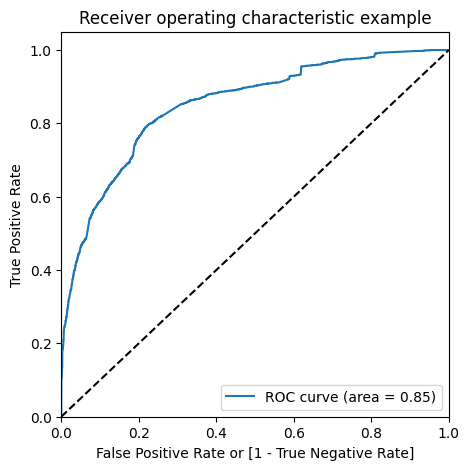

In [219]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

**Since we have higher (0.85) area under the ROC curve , therefore our model is a good one.**

### Finding Optimal Cutoff Point

**Above we had chosen an arbitrary cut-off value of 0.5. We need to determine the best cut-off value and the below section deals with that. Optimal cutoff probability is that prob where we get balanced sensitivity and specificity**


In [220]:
# Let's create columns with different probability cutoffs
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.250687,3009,0,1,1,1,0,0,0,0,0,0,0
1,0,0.670888,1012,1,1,1,1,1,1,1,1,0,0,0
2,0,0.286951,9226,0,1,1,1,0,0,0,0,0,0,0
3,1,0.875633,4750,1,1,1,1,1,1,1,1,1,1,0
4,1,0.711399,7987,1,1,1,1,1,1,1,1,1,0,0


In [221]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1

    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.540860  0.973835  0.269654
0.2   0.2  0.690442  0.888798  0.566197
0.3   0.3  0.777673  0.806623  0.759539
0.4   0.4  0.785546  0.753066  0.805890
0.5   0.5  0.779877  0.643091  0.865557
0.6   0.6  0.778932  0.552330  0.920871
0.7   0.7  0.756259  0.434996  0.957490
0.8   0.8  0.736262  0.356909  0.973880
0.9   0.9  0.696111  0.220769  0.993854


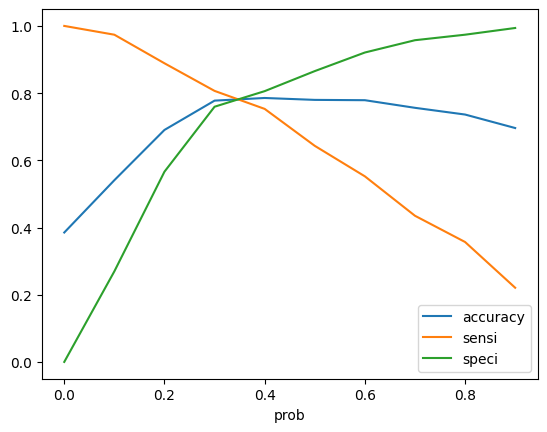

In [222]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.35 is the optimum point to take it as a cutoff probability.

In [223]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.35 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.250687,3009,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.670888,1012,1,1,1,1,1,1,1,1,0,0,0,1
2,0,0.286951,9226,0,1,1,1,0,0,0,0,0,0,0,0
3,1,0.875633,4750,1,1,1,1,1,1,1,1,1,1,0,1
4,1,0.711399,7987,1,1,1,1,1,1,1,1,1,0,0,1


### Assigning Lead Score to the Training data


In [224]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.250687,3009,0,1,1,1,0,0,0,0,0,0,0,0,25
1,0,0.670888,1012,1,1,1,1,1,1,1,1,0,0,0,1,67
2,0,0.286951,9226,0,1,1,1,0,0,0,0,0,0,0,0,29
3,1,0.875633,4750,1,1,1,1,1,1,1,1,1,1,0,1,88
4,1,0.711399,7987,1,1,1,1,1,1,1,1,1,0,0,1,71


## Model Evaluation

In [225]:
# Let's check the overall accuracy.
print("Accuracy :",metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

Accuracy : 0.7850732168162494


In [227]:
# Confusion matrix
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3071,  834],
       [ 531, 1915]])

In [228]:
TP = confusion2[1,1] # true positive
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [229]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity : ",TP / float(TP+FN))

Sensitivity :  0.7829108748977923


In [230]:
# Let us calculate specificity
print("Specificity :",TN / float(TN+FP))

Specificity : 0.7864276568501921


In [231]:
# Calculate false postive rate - predicting converted lead when the lead was actually not have converted
print("False Positive rate : ",FP/ float(TN+FP))

False Positive rate :  0.21357234314980794


In [232]:
# Positive predictive value
print("Positive Predictive Value :",TP / float(TP+FP))

Positive Predictive Value : 0.6966169516187705


In [233]:
# Negative predictive value
print("Negative Predictive Value : ",TN / float(TN+ FN))

Negative Predictive Value :  0.8525818989450306


## Precision and Recall

* **Precision = Also known as Positive Predictive Value, it refers to the percentage of the results which are relevant.**
* **Recall = Also known as Sensitivity , it refers to the percentage of total relevant results correctly classified by the algorithm.**

In [235]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3380,  525],
       [ 873, 1573]])

In [236]:
# Precision
TP / TP + FP

print("Precision : ",confusion[1,1]/(confusion[0,1]+confusion[1,1]))

Precision :  0.7497616777883699


In [237]:
# Recall
TP / TP + FN

print("Recall :",confusion[1,1]/(confusion[1,0]+confusion[1,1]))

Recall : 0.643090760425184


Using sklearn utilities for the same

In [238]:
from sklearn.metrics import precision_score, recall_score

In [239]:
print("Precision :",precision_score(y_train_pred_final.Converted , y_train_pred_final.predicted))

Precision : 0.7497616777883699


In [240]:
print("Recall :",recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

Recall : 0.643090760425184


### Precision and recall tradeoff¶

In [241]:
from sklearn.metrics import precision_recall_curve

y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Converted, Length: 6351, dtype: int64,
 0       0
 1       1
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: predicted, Length: 6351, dtype: int64)

In [242]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

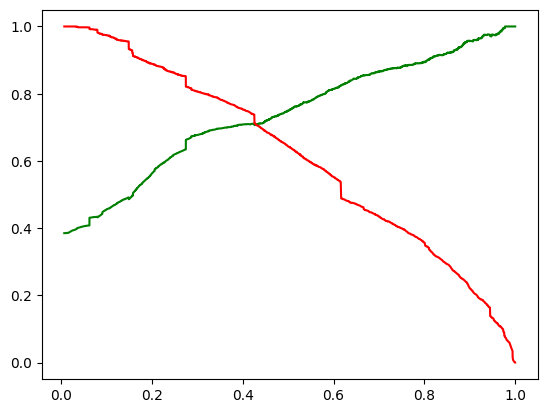

In [243]:
# plotting a trade-off curve between precision and recall
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

**The above graph shows the trade-off between the Precision and Recall .

## Making predictions on the test set

### Scaling the test data

In [244]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits',
                                                                                                        'Total Time Spent on Website',
                                                                                                        'Page Views Per Visit']])

In [245]:
# Assigning the columns selected by the final model to the X_test
X_test = X_test[col1]
X_test.head()

,Do Not Email,Do Not Call,Total Time Spent on Website,Lead Origin_Lead Import,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_SMS Sent,What is your current occupation_Student,What is your current occupation_Working Professional,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website
3271,0,0,-0.600595,0,0,0,0,0,0,0,0,0,1,0,0,0
1490,0,0,1.887326,0,0,0,0,0,0,0,1,0,1,0,0,0
7936,0,0,-0.752879,0,0,0,0,0,0,0,0,0,1,0,0,0
4216,0,0,-0.888650,0,0,0,0,0,0,1,0,0,0,1,0,0
3830,0,0,-0.587751,0,0,0,0,0,0,0,0,0,1,0,0,0


In [246]:
# Adding a const
X_test_sm = sm.add_constant(X_test)

# Making predictions on the test set
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

3271    0.184438
1490    0.979357
7936    0.164930
4216    0.126935
3830    0.186163
1800    0.819766
6507    0.477625
4821    0.347530
4223    0.425546
4714    0.286951
dtype: float64

In [247]:
# Converting y_test_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [248]:
# Let's see the head
y_pred_1.head()

,0
3271,0.184438
1490,0.979357
7936,0.164930
4216,0.126935
3830,0.186163


In [249]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [250]:
# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

In [251]:
# Removing index for both dataframes to append them side by side
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [252]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [253]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,3271,0.184438
1,1,1490,0.979357
2,0,7936,0.164930
3,1,4216,0.126935
4,0,3830,0.186163


In [254]:
# Renaming the column
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [255]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(columns=['Prospect ID','Converted','Converted_prob'])

In [256]:
# Let's see the head of y_pred_final
y_pred_final.head()


,Prospect ID,Converted,Converted_prob
0,3271,0,0.184438
1,1490,1,0.979357
2,7936,0,0.164930
3,4216,1,0.126935
4,3830,0,0.186163


In [257]:
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.34 else 0)

In [258]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted
0,3271,0,0.184438,0
1,1490,1,0.979357,1
2,7936,0,0.164930,0
3,4216,1,0.126935,0
4,3830,0,0.186163,0


In [259]:
# Let's check the overall accuracy.
print("Accuracy :",metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted))

Accuracy : 0.7763496143958869


In [260]:
# Making the confusion matrix
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1356,  378],
       [ 231,  758]])

In [261]:
TP = confusion2[1,1] # true positive
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [262]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity :",TP / float(TP+FN))

Sensitivity : 0.7664307381193124


In [263]:
# Let us calculate specificity
print("Specificity :",TN / float(TN+FP))

Specificity : 0.7820069204152249


### Assigning Lead Score to the Testing data

In [264]:
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted,Lead_Score
0,3271,0,0.184438,0,18
1,1490,1,0.979357,1,98
2,7936,0,0.164930,0,16
3,4216,1,0.126935,0,13
4,3830,0,0.186163,0,19


## Observations:
After running the model on the Test Data , we obtain:

* **Accuracy : 77 %**
* **Sensitivity : 76.6 %**
* **Specificity : 78.2 %**

## Results :

### 1) Comparing the values obtained for Train & Test:

#### Train Data:

* **Accuracy : 78.07 %**
* **Sensitivity :78.29 %**
* **Specificity : 78.64 %**

#### Test Data:

* **Accuracy : 77 %**
* **Sensitivity : 77 %**
* **Specificity : 78.2%**

**Thus we have achieved our goal of getting a ballpark of the target lead conversion rate to be around 80% . The Model seems to predict the Conversion Rate very well and we should be able to give the CEO confidence in making good calls based on this model to get a higher lead conversion rate of 80%.**

### 2) Finding out the leads which should be contacted:
#### The customers which should be contacted are the customers whose "Lead Score" is equal to or greater than 80. They can be termed as 'Hot Leads'.

In [267]:
hot_leads=y_pred_final.loc[y_pred_final["Lead_Score"]>=80]
hot_leads

,Prospect ID,Converted,Converted_prob,final_predicted,Lead_Score
1,1490,1,0.979357,1,98
5,1800,1,0.819766,1,82
16,1946,1,0.801760,1,80
21,2461,1,0.994190,1,99
23,5822,1,0.944457,1,94
...,...,...,...,...,...
2694,1566,1,0.968192,1,97
2699,6461,1,0.889326,1,89
2703,5741,1,0.908951,1,91
2715,6299,1,0.881209,1,88


**So there are 374 leads which can be contacted and have a high chance of getting converted.  The Prospect ID of the customers to be contacted are :**

In [268]:
print("The Prospect ID of the customers which should be contacted are :")

hot_leads_ids = hot_leads["Prospect ID"].values.reshape(-1)
hot_leads_ids

The Prospect ID of the customers which should be contacted are :


array([1490, 1800, 1946, 2461, 5822, 2684, 4062, 7696, 9049, 1518, 4543,
       4830, 4365, 3542, 7347, 2504, 7674, 8596, 4003, 4963, 6947, 4807,
        446,  789, 8372, 5805, 4478, 3758,  337, 1561,  737, 9034, 3631,
       6423, 8286, 4047, 4461, 1436, 7552, 5173, 4080, 1475, 5785, 2860,
       4297, 5490, 1995, 6532, 4498, 5797, 8687, 7653,   76, 2018, 6743,
       3703, 3307, 4208, 8642, 3976, 5769, 4978, 5742,  305, 1663, 6557,
       8959, 7521, 6177, 8282, 6297, 8213, 9063, 6913, 1481,  785, 3265,
       3285, 3685, 3858, 8106,  373, 4446, 3055, 7417, 4179, 4994, 8568,
       7268, 4353, 6784, 7236, 7859, 5725, 7753, 3983, 4487,  802, 8745,
       4455, 4717,  505, 8509, 6094, 4992, 7036, 2680, 7065, 2726, 3827,
       5435, 7175, 1675, 6999, 5932, 5826, 6627, 8492, 6499, 3439, 7468,
       4793, 3227, 1557, 7165,  822, 3072, 2600, 8111, 2378, 5090, 5075,
       7699, 5638, 8077, 6082, 2727,  720, 5724, 1542, 5656, 6728, 6332,
       8461, 7876, 5135, 2427,  174, 2674, 1568, 85

### 3) Finding out the Important Features  from our final model:

In [ ]:
res.params.sort_values(ascending=False)

## Recommendations:


* The company **should make calls** to the leads who are the `"working professionals"` as they are more likely to get converted.
* The company **should make calls** to the leads who spent `"more time on the websites"` as these are more likely to get converted.
* The company **should make calls** to the leads coming from the `lead sources "Olark Chat"` as these are more likely to get converted.
* The company **should make calls** to the leads whose `last activity` was `SMS Sent` as they are more likely to get converted.

* The company **should not make calls** to the leads whose `last activity` was `"Olark Chat Conversation"` as they are not likely to get converted.
* The company **should not make calls** to the leads whose `lead origin` is `"Landing Page Submission"` as they are not likely to get converted.
* The company **should not make calls** to the leads whose `Specialization` was `"Others"` as they are not likely to get converted.
* The company **should not make calls** to the leads who chose the option of `"Do not Email" as "yes"` as they are not likely to get converted.